In [198]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from astropy.nddata import Cutout2D
from astropy.io import fits
import itertools
import photutils

In [199]:
rawdata = glob.glob('nickel20210919/*.fits')

In [200]:
for frame in rawdata:
    file = fits.open(frame)
    #print(file.info())
    print(frame)
    print (file[0].header['OBJECT'])
    file.close()

nickel20210919\d1028.fits
bias
nickel20210919\d1029.fits
bias
nickel20210919\d1030.fits
bias
nickel20210919\d1031.fits
bias
nickel20210919\d1032.fits
bias
nickel20210919\d1033.fits
bias
nickel20210919\d1034.fits
bias
nickel20210919\d1035.fits
bias
nickel20210919\d1036.fits
bias
nickel20210919\d1037.fits
bias
nickel20210919\d1038.fits
bias
nickel20210919\d1039.fits
dark
nickel20210919\d1040.fits
dark5
nickel20210919\d1041.fits
dark5
nickel20210919\d1042.fits
dark5
nickel20210919\d1043.fits
dark5
nickel20210919\d1044.fits
dark10
nickel20210919\d1045.fits
dark10
nickel20210919\d1046.fits
dark10
nickel20210919\d1047.fits
dark10
nickel20210919\d1048.fits
dark10
nickel20210919\d1049.fits
dark20
nickel20210919\d1050.fits
dark20
nickel20210919\d1051.fits
dark20
nickel20210919\d1052.fits
dark20
nickel20210919\d1053.fits
dark20
nickel20210919\d1055.fits
dflat
nickel20210919\d1056.fits
dflat
nickel20210919\d1057.fits
dflat
nickel20210919\d1058.fits
dflat
nickel20210919\d1059.fits
dflat
nickel2021

In [201]:
bias_frames = []
dflat_frames = []
dark_frames = []
sflat_frames = []
pluto_frames = []

for frame in rawdata:
    file = fits.open(frame)
    name = file[0].header['OBJECT']
    
    if name == 'bias':
        bias_frames.append(frame)
    
    if name == 'dark5':
        dark_frames.append(frame)
    if name == 'dark5':
        dark_frames.append(frame)
    if name == 'dark10':
        dark_frames.append(frame)
    if name == 'dark20':
        dark_frames.append(frame)
        
    if name == 'dflat':
        dflat_frames.append(frame)      
    if name == 'sky_flatR':
        sflat_frames.append(frame)
        
    if name == 'pluto_R':
        pluto_frames.append(frame)
        
    file.close()

In [202]:
print(bias_frames)

['nickel20210919\\d1028.fits', 'nickel20210919\\d1029.fits', 'nickel20210919\\d1030.fits', 'nickel20210919\\d1031.fits', 'nickel20210919\\d1032.fits', 'nickel20210919\\d1033.fits', 'nickel20210919\\d1034.fits', 'nickel20210919\\d1035.fits', 'nickel20210919\\d1036.fits', 'nickel20210919\\d1037.fits', 'nickel20210919\\d1038.fits']


# Organize the data into usable arrays

In [154]:
pre_combined_biases = []


for frame in bias_frames:
    file = fits.open(frame)
    data = file[0].data
    #print(len(data))
    #print(len(data[0]))
    for i,j in itertools.product(range(1024), range(1056)):
        data[i][j] = float(data[i][j])
        
    #print(data)
    pre_combined_biases.append(data)
    file.close()

In [155]:
pre_combined_dflats = []


for frame in dflat_frames:
    file = fits.open(frame)
    data = file[0].data
    #print(len(data))
    #print(len(data[0]))
    for i,j in itertools.product(range(1024), range(1056)):
        data[i][j] = float(data[i][j])
        
    #print(data)
    pre_combined_dflats.append(data)
    file.close()

In [195]:
pre_combined_sflats = []


for frame in sflat_frames:
    file = fits.open(frame)
    data = file[0].data
    #print(len(data))
    #print(len(data[0]))
    for i,j in itertools.product(range(1024), range(1056)):
        data[i][j] = float(data[i][j])
        
    #print(data)
    pre_combined_sflats.append(data)
    file.close()

FileNotFoundError: [Errno 2] No such file or directory: 'nickel20210919\\d1139.fits'

In [157]:
pre_combined_pluto = []


for frame in pluto_frames:
    file = fits.open(frame)
    data = file[0].data
    #print(len(data))
    #print(len(data[0]))
    for i,j in itertools.product(range(1024), range(1056)):
        data[i][j] = float(data[i][j])
        
    #print(data)
    pre_combined_pluto.append(data)
    file.close()

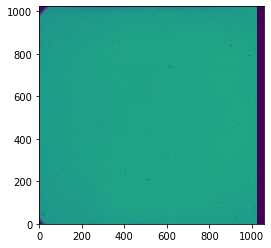

In [158]:
plt.imshow(pre_combined_dflats[0], origin='lower')

# Combine your biases

In [162]:
# bias_combined = np.zeros(shape=(1024,1056))

# for i,j in itertools.product(range(1024), range(1056)):
#     pixel_dist = []
#     for frame in pre_combined_data:
#         pixel_dist.append(frame[i][j])
#     pixel_median = np.median(pixel_dist)
    
#     bias_combined[i][j] = pixel_median

In [163]:
bias_combined = np.median(pre_combined_biases, axis=0)
print (np.shape((bias_combined)))

(1024, 1056)


In [165]:
print (bias_combined)

[[1001. 1001. 1000. ...  997.  994.  994.]
 [1003. 1003. 1002. ...  997.  994.  990.]
 [1003. 1003. 1002. ...  998.  994.  993.]
 ...
 [1009. 1003. 1002. ...  997.  997.  997.]
 [1004. 1006. 1002. ...  996.  995.  995.]
 [1010. 1004. 1001. ...  995.  994.  992.]]


# Subtract the bias from all of your frames (except darks for now)

In [166]:
for frame in pre_combined_dflats:
    frame - bias_combined

for frame in pre_combined_sflats:
    frame - bias_combined

for frame in pre_combined_pluto:
    frame - bias_combined

# Normalize my Dark Frames with time and combine

In [167]:
pre_combined_darks = []


for frame in dark_frames:
    file = fits.open(frame)
    data = file[0].data
    #print(len(data))
    #print(len(data[0]))
    for i,j in itertools.product(range(1024), range(1056)):
        data[i][j] = float(data[i][j])
        
    data = (data - bias_combined) / file[0].header['EXPTIME'] 
    pre_combined_darks.append(data)
    file.close()

In [168]:
dark_combined = np.median(pre_combined_darks, axis=0)

In [183]:
print(dark_combined)

[[ 0.     0.05   0.3   ... -0.325  0.1    0.   ]
 [-0.35  -0.2   -0.05  ... -0.55   0.     0.15 ]
 [-0.3   -0.2   -0.375 ... -1.    -0.275  0.   ]
 ...
 [-0.625 -0.6   -0.5   ... -0.9   -0.625 -0.4  ]
 [-0.375 -0.85  -0.8   ... -0.75  -0.8   -0.475]
 [-1.2   -0.65  -0.425 ... -1.25  -0.9   -0.625]]


# Normalize my dome flats

In [120]:
'''pre_combined_normflats = []

for frame in pre_combined_dflats:
    three_sig = 40000# = np.percentile(frame, 99.6)
    print(three_sig)
    mask = frame < three_sig
    
    max_norm = np.max(mask*frame)
    
    norm_frame = (frame-5*dark_combined)/max_norm
    
    pre_combined_normflats.append(norm_frame)'''
pre_combined_normflats = []
for frame in pre_combined_dflats:
    fps = (frame-5*dark_combined) / 5
    pre_combined_normflats.append(fps)

In [80]:
pre_combined_normflats_masked = []

for flat in pre_combined_normflats:
    mask2 = flat < 1
    pre_combined_normflats_masked.append(mask2*flat)

In [81]:
np.min(pre_combined_normflats_masked[0])

0.0

# Median my dome flat

In [122]:
dflat_combined = np.median(pre_combined_normflats, axis=0)

# Normalize my sky flats

In [196]:
"""pre_combined_normflats = []

for frame in pre_combined_sflats:
    three_sig = np.percentile(frame, 99.7)
    #print(three_sig)
    #mask = frame < three_sig
    mask = frame < 64000
    
    max_norm = np.max(mask*frame)
    print(max_norm)
    
    #norm_frame = (frame-5*dark_combined)/max_norm
    norm_frame = (frame)/max_norm
    pre_combined_normflats.append(norm_frame)""" #this doesn't work >:c
#for frame in pre_combined_sflats:
sflat_combined = np.mean(pre_combined_sflats, axis=0) / 10
np.shape(sflat_combined)

(1024, 1056)

In [192]:
sflat_combined = np.median(pre_combined_normflats_masked, axis=0)

# Median pluto

In [186]:
pluto_combined = np.median(pre_combined_pluto, axis=0)

# Apply corrections

In [187]:
pluto_final = (pluto_combined/15 - dark_combined) / (sflat_combined-dark_combined)

In [188]:
print(np.max(pluto_final))

0.7040687405726662


Work Flow:
1: median the bias
2: subtract bias from all frames
3: time normalize the rest of your calibration frames (assuming they're linear)
4: median the rest of your calibration frames (darks+flats)
5: scale and apply calibrations to science
6: median together science
7: done :)

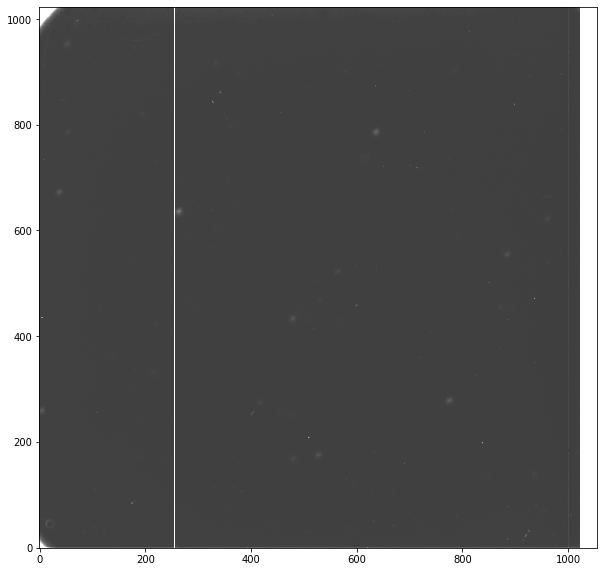

In [189]:
plt.figure(figsize=(10,10))
plt.imshow(pluto_final, origin='lower', cmap='gray', vmin=-0.05, vmax=0.35)

In [181]:
print(pluto_final)

[[0.49701046 0.53459119 0.50352467 ... 0.6634077  0.66229398 0.66396761]
 [0.36228756 0.42851046 0.43034586 ... 0.65853659 0.65366667 0.66113068]
 [0.33802109 0.44056251 0.43259666 ... 0.65875371 0.65926296 0.65698063]
 ...
 [0.55871886 0.56703359 0.54268624 ... 0.65735196 0.65939667 0.65799132]
 [0.55807921 0.55648187 0.550808   ... 0.65781119 0.6596456  0.66322505]
 [0.53811057 0.56653884 0.56513696 ... 0.66116942 0.66331658 0.66172157]]


In [182]:
file = fits.PrimaryHDU(pluto_final)
file.writeto('pluto_reduced.fits', overwrite=True)

In [148]:
file = fits.PrimaryHDU(sflat_combined)
file.writeto('normflat.fits', overwrite=True)